In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib

In [2]:
df = pd.read_csv('Usa.csv')

In [3]:
# Daftar negara bagian di AS berdasarkan wilayah geografis
states_west = ['California', 'Oregon', 'Washington', 'Nevada', 'Arizona', 'Utah', 'Colorado', 'New Mexico', 'Idaho', 'Montana', 'Wyoming', 'Hawaii', 'Alaska']
states_east = ['Maine', 'Vermont', 'New Hampshire', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'New Jersey', 'Pennsylvania', 'Delaware', 'Maryland', 'Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Ohio', 'Michigan', 'Indiana', 'Kentucky', 'Tennessee', 'West Virginia', 'Missouri', 'Arkansas', 'Louisiana', 'Alabama', 'Mississippi', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Iowa', 'Wisconsin']
states_north = ['Maine', 'New Hampshire', 'Vermont', 'Michigan', 'Minnesota', 'Wisconsin', 'Montana', 'North Dakota', 'South Dakota', 'Wyoming']
states_south = ['Texas', 'Florida', 'Georgia', 'North Carolina', 'South Carolina', 'Tennessee', 'Alabama', 'Louisiana', 'Kentucky', 'Mississippi', 'Arkansas']

# Fungsi untuk menentukan wilayah berdasarkan state
def categorize_state(state):
    if state in states_west:
        return 'West'
    elif state in states_east:
        return 'East'
    elif state in states_north:
        return 'North'
    elif state in states_south:
        return 'South'
    else:
        return 'Other'

# Contoh DataFrame
df = pd.read_csv('Usa.csv')  # Sesuaikan dengan dataset Anda

# Menggunakan fungsi untuk menambahkan kolom wilayah
df['Region'] = df['State'].apply(categorize_state)

In [4]:
print(df.isnull().sum())

Location        0
Month           0
Year            0
Season          0
Address         0
Latitude        0
Longitude       0
Categories      0
State         901
Region          0
dtype: int64


In [5]:
categorical_columns = ['State']
for col in categorical_columns:
    df[col] = df[col].fillna(df[col].mode()[0])

In [6]:
print(df.isnull().sum())

Location      0
Month         0
Year          0
Season        0
Address       0
Latitude      0
Longitude     0
Categories    0
State         0
Region        0
dtype: int64


In [7]:
label_encoder_region = LabelEncoder()
df['Region_enc'] = label_encoder_region.fit_transform(df['Region'])

In [8]:
label_encoder_categories = LabelEncoder()
df['Categories_enc'] = label_encoder_categories.fit_transform(df['Categories'])

In [9]:
X = df[['Region_enc', 'Latitude', 'Longitude']]
y = df['Categories_enc']

In [10]:
feature_names = X.columns.tolist()

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
print("Jumlah kelas setelah SMOTE:")
print(pd.Series(y_train_res).value_counts())

Jumlah kelas setelah SMOTE:
Categories_enc
3    23221
4    23221
1    23221
0    23221
2    23221
Name: count, dtype: int64


In [12]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


In [14]:
modelRF = RandomForestClassifier(n_estimators=100, random_state=42)
modelRF.fit(X_train_res, y_train_res)

RandomForestClassifier(random_state=42)

In [27]:
y_pred = modelRF.predict(X_test_scaled)

In [16]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Accuracy: 0.9246

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.91      0.86       726
           1       0.76      0.90      0.82       337
           2       0.74      0.89      0.81       279
           3       0.97      0.94      0.95      5811
           4       0.87      0.89      0.88      1185

    accuracy                           0.92      8338
   macro avg       0.83      0.91      0.87      8338
weighted avg       0.93      0.92      0.93      8338



<Figure size 800x600 with 0 Axes>

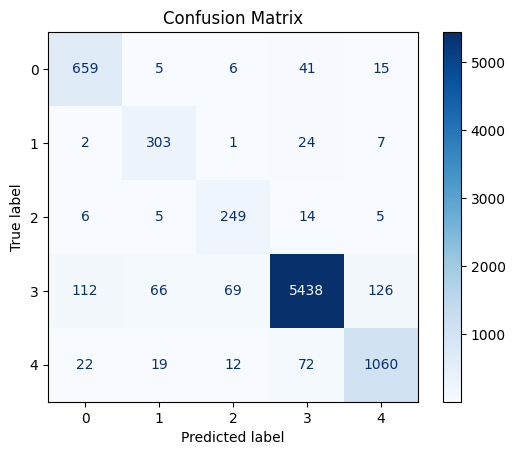

In [28]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelRF.classes_)

plt.figure(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues, values_format="d")
plt.title("Confusion Matrix")
plt.show()


In [36]:
import joblib

joblib.dump(modelRF, 'RFmodel.pkl')
joblib.dump(scaler, 'scaler2.pkl')
joblib.dump(label_encoder_region, 'state_label_encoder.pkl')
joblib.dump(label_encoder_categories, 'categories_label_encoder.pkl')

['categories_label_encoder.pkl']

In [37]:
joblib.dump(feature_names, 'feature_names.pkl')

['feature_names.pkl']

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
modelfnn = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_res.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(5, activation='softmax')
])

In [35]:
modelfnn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 128)                 │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 5)                   │             165 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33,041 (129.07 KB)

 Trainable params: 11,013 (43.02 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 22,028 (86.05 KB)

In [25]:
modelfnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Melatih model tanpa mengubah target menjadi one-hot encoded
history = modelfnn.fit(X_train_res, y_train_res, epochs=20, validation_split=0.2)

Epoch 1/20
2903/2903 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.6120 - loss: 0.9144 - val_accuracy: 0.4034 - val_loss: 1.7333
Epoch 2/20
2903/2903 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.6071 - loss: 0.9177 - val_accuracy: 0.3805 - val_loss: 1.6442
Epoch 3/20
2903/2903 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.6100 - loss: 0.9138 - val_accuracy: 0.3254 - val_loss: 1.7545
Epoch 4/20
2903/2903 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6114 - loss: 0.9142 - val_accuracy: 0.3744 - val_loss: 1.7176
Epoch 5/20
2903/2903 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.6148 - loss: 0.9087 - val_accuracy: 0.3502 - val_loss: 1.7522
Epoch 6/20
2903/2903 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.6146 - loss: 0.9085 - val_accuracy: 0.3448 - val_loss: 1.7144
Epoch 7/20
2903/2903 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.6159 - loss: 0.9041 - val_accuracy: 0.3219 - val_loss: 1.7467
Epoch 8/20
2903/2903 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.6137 - loss: 0.9085 

In [30]:
# Evaluasi model pada dataset uji
test_loss, test_accuracy = modelfnn.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.2f}")

Test Accuracy: 0.42


In [33]:
y_pred = modelfnn.predict(X_test_scaled)
y_pred_classes = y_pred.argmax(axis=1)


261/261 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_classes))


              precision    recall  f1-score   support

           0       0.32      0.68      0.44       726
           1       0.10      0.82      0.18       337
           2       0.23      0.83      0.36       279
           3       0.83      0.39      0.53      5811
           4       0.92      0.21      0.34      1185

    accuracy                           0.42      8338
   macro avg       0.48      0.59      0.37      8338
weighted avg       0.75      0.42      0.48      8338



261/261 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


<Figure size 800x600 with 0 Axes>

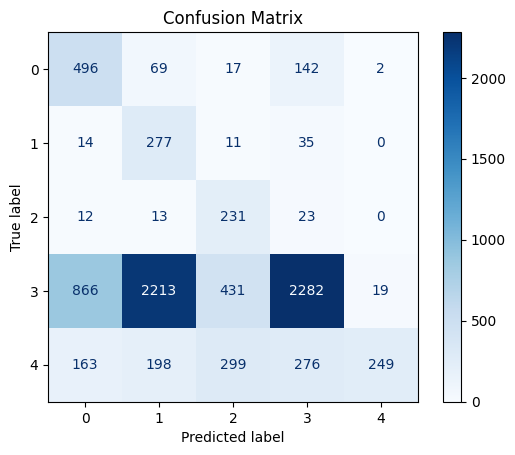

In [31]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Lakukan prediksi pada dataset uji
y_pred_probs = modelfnn.predict(X_test_scaled)  # Probabilitas output
y_pred = np.argmax(y_pred_probs, axis=1)        # Prediksi kelas

# Buat confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Tampilkan confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
plt.figure(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix")
plt.show()